In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.2.1+cu121 (Tesla T4)


In [3]:
!cp /content/drive/MyDrive/final_dataset.zip /content/yolov5/

In [4]:
!pwd
!!unzip -q final_dataset.zip

/content/yolov5


[]

In [5]:
%cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['nameboards']

roboflow:
  workspace: aniruddha-kashyap
  project: shop_name_analysis
  version: 1
  license: Private
  url: https://app.roboflow.com/aniruddha-kashyap/shop_name_analysis/1

In [ ]:
# train yolov5l on custom data for 50 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 32 --epochs 50 --data data.yaml --cfg ./models/yolov5l.yaml --weights yolov5l.pt --name yolov5l_results3 --cache

/content/yolov5
2024-04-21 01:54:20.272764: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 01:54:20.272819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 01:54:20.274824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5l.pt, cfg=./models/yolov5l.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_

In [ ]:
!python train.py --img 416 --batch 32 --epochs 75 --data data.yaml --hyp data/hyps/hyp.scratch-low.yaml --cfg ./models/yolov5l.yaml --weights runs/train/yolov5l_results3/weights/best.pt --name yolov5l_results6 --cache

2024-04-21 02:09:32.328307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 02:09:32.328363: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 02:09:32.329802: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=runs/train/yolov5l_results3/weights/best.pt, cfg=./models/yolov5l.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=75, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False

In [ ]:
!cp -a /content/yolov5/runs/train/yolov5l_results6/weights/last.pt /content/drive/MyDrive/Shop_name_analysis_weights


In [ ]:
!cp -a /content/yolov5/runs/train/yolov5l_results6/weights/best.pt /content/drive/MyDrive/Shop_name_analysis_weights

In [ ]:
!cp -a /content/yolov5/runs/val/exp2/ /content/drive/MyDrive/Shop_name_analysis_results/

In [ ]:
!python val.py  --weights runs/train/yolov5l_results6/weights/last.pt --data data.yaml --img 416 --conf 0.5 --iou 0.5

val: data=data.yaml, weights=['runs/train/yolov5l_results6/weights/last.pt'], batch_size=32, imgsz=416, conf_thres=0.5, iou_thres=0.5, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.5 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
val: Scanning /content/yolov5/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100% 75/75 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  In

In [ ]:
!python val.py --task test --weights runs/train/yolov5l_results6/weights/last.pt --data data.yaml --img 416 --conf 0.5 --iou 0.5

val: data=data.yaml, weights=['runs/train/yolov5l_results6/weights/last.pt'], batch_size=32, imgsz=416, conf_thres=0.5, iou_thres=0.5, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.5 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
test: Scanning /content/yolov5/test/labels... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<00:00, 607.46it/s]
test: New cache created: /content

In [ ]:
!python detect.py --weights runs/train/yolov5l_results6/weights/last.pt --source /content/yolov5/test/images/ --data data.yaml --img 416 --conf 0.5 --iou 0.5

detect: weights=['runs/train/yolov5l_results6/weights/last.pt'], source=/content/yolov5/test/images/, data=data.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/38 /content/yolov5/test/images/img015_PNG.rf.aa63d3fb7cab361fe9e2f4c306c59cb0.jpg: 416x416 1 nameboards, 28.0ms
image 2/38 /content/yolov5/test/images/img017_PNG.rf.f39d08325c83cb38c1482fff1d36fdf1.jpg: 416x416 1 nameboards, 28.0ms
image 3/38 /content/yolov5/test/images/img068_PNG.rf.ac08261e2bbb6e422127

In [ ]:
!cp -a /content/yolov5/runs/detect/exp4/ /content/drive/MyDrive/Shop_name_analysis_results


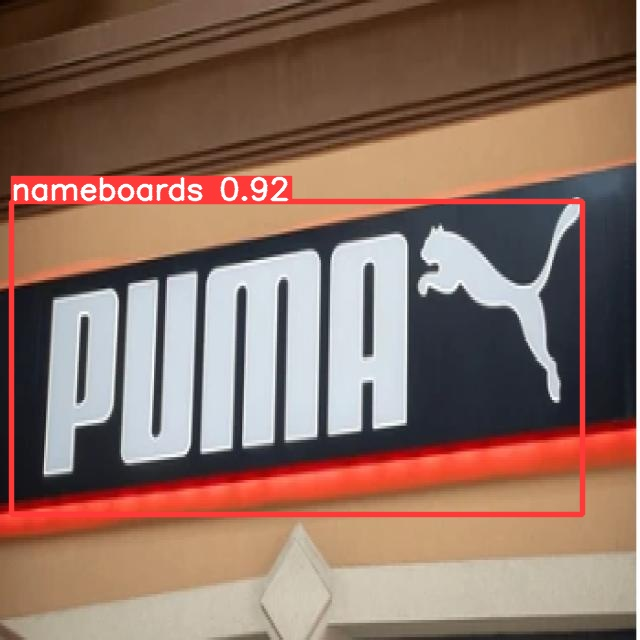

In [ ]:
import cv2
from PIL import Image, ImageOps
from google.colab.patches import cv2_imshow

path= "/content/drive/MyDrive/Shop_name_analysis_results/exp4/img078_PNG.rf.edbd688fba54511261576e759ca414a5.jpg"


img=cv2.imread(path)
cv2_imshow(img)

In [ ]:
!sudo add-apt-repository ppa:alex-p/tesseract-ocr
!sudo apt-get update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!sudo pip install pytesseract

Repository: 'deb https://ppa.launchpadcontent.net/alex-p/tesseract-ocr/ubuntu/ jammy main'
Description:
 The Tesseract OCR engine was one of the top 3 engines in the 1995
 UNLV Accuracy test. Between 1995 and 2006 it had little work done on
 it, but since then it has been improved extensively by Google and is
 probably one of the most accurate open source OCR engines
 available. It can read a wide variety of image formats and convert
 them to text in over 40 languages. This package includes the command
 line tool.
More info: https://launchpad.net/~alex-p/+archive/ubuntu/tesseract-ocr
Adding repository.
Press [ENTER] to continue or Ctrl-c to cancel.
Adding deb entry to /etc/apt/sources.list.d/alex-p-ubuntu-tesseract-ocr-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/alex-p-ubuntu-tesseract-ocr-jammy.list
Adding key to /etc/apt/trusted.gpg.d/alex-p-ubuntu-tesseract-ocr.gpg with fingerprint 8529B1E0F8BF7F65C12FABB0A4BCBD87CEF9E52D
Get:1 https://developer.download.nvid

In [ ]:
!pan.py -d -t

/bin/bash: line 1: pan.py: command not found


In [ ]:
!git clone https://github.com/aqntks/Easy-Yolo-OCR
%cd Easy-Yolo-OCR
!pip install -r requirements.txt

Cloning into 'Easy-Yolo-OCR'...
remote: Enumerating objects: 714, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 714 (delta 7), reused 0 (delta 0), pack-reused 700
Receiving objects: 100% (714/714), 124.24 MiB | 23.63 MiB/s, done.
Resolving deltas: 100% (308/308), done.
Updating files: 100% (344/344), done.
/content/yolov5/Easy-Yolo-OCR
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0


In [ ]:
%cd yolov5/Easy-Yolo-OCR/

/content/yolov5/Easy-Yolo-OCR


In [ ]:
!python detect.py --weights runs/train/yolov5l_results6/weights/last.pt --source /content/yolov5/test/images/img078_PNG.rf.edbd688fba54511261576e759ca414a5.jpg --data data.yaml --img 416 --conf 0.5 --iou 0.5 --save-crop

detect: weights=['runs/train/yolov5l_results6/weights/last.pt'], source=/content/yolov5/test/images/img078_PNG.rf.edbd688fba54511261576e759ca414a5.jpg, data=data.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/test/images/img078_PNG.rf.edbd688fba54511261576e759ca414a5.jpg: 416x416 1 nameboards, 28.0ms
Speed: 0.4ms pre-process, 28.0ms inference, 573.7ms NMS per image at shape (1, 3, 416, 416)
Results sav

In [10]:
!python detect.py --weights /content/drive/MyDrive/Shop_name_analysis_results/last.pt --source /content/yolov5/test/images/img015_PNG.rf.aa63d3fb7cab361fe9e2f4c306c59cb0.jpg --data data.yaml --img 416 --conf 0.5 --iou 0.5 --save-crop

detect: weights=['/content/drive/MyDrive/Shop_name_analysis_results/last.pt'], source=/content/yolov5/test/images/img015_PNG.rf.aa63d3fb7cab361fe9e2f4c306c59cb0.jpg, data=data.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5l summary: 267 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/yolov5/test/images/img015_PNG.rf.aa63d3fb7cab361fe9e2f4c306c59cb0.jpg: 416x416 1 nameboards, 28.0ms
Speed: 0.4ms pre-process, 28.0ms inference, 473.0ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp4


In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr
import pytesseract
text = pytesseract.image_to_string("runs/detect/exp/crops/nameboards/img078_PNG.rf.edbd688fba54511261576e759ca414a5.jpg")
print(text)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.



In [ ]:
!pip install opencv-contrib-python


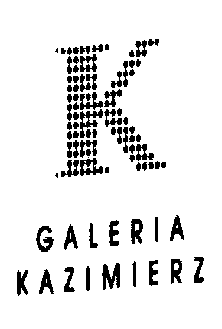

In [ ]:
import numpy as np
import pytesseract
import argparse
import imutils
import cv2
from PIL import Image, ImageOps
from google.colab.patches import cv2_imshow


# load the input image and convert it to grayscale
img= "runs/detect/exp2/crops/nameboards/img015_PNG.rf.aa63d3fb7cab361fe9e2f4c306c59cb0.jpg"
image = cv2.imread(img)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# threshold the image using Otsu's thresholding method
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

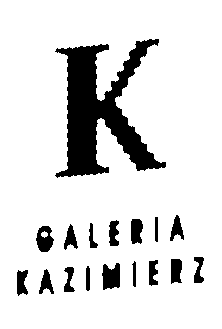

In [ ]:
# apply an "opening" morphological operation to disconnect components
# in the image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

In [ ]:
# find contours in the opening image, then initialize the list of
# contours which belong to actual characters that we will be OCR'ing
cnts = cv2.findContours(opening.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
chars = []
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# check if contour is at least 35px wide and 100px tall, and if
	# so, consider the contour a digit
	if w >= 35 and h >= 100:
		chars.append(c)

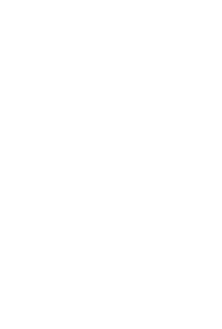

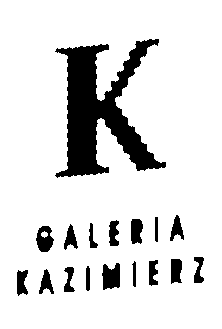

In [ ]:
# compute the convex hull of the characters
chars = np.vstack([chars[i] for i in range(0, len(chars))])
hull = cv2.convexHull(chars)
# allocate memory for the convex hull mask, draw the convex hull on
# the image, and then enlarge it via a dilation
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.drawContours(mask, [hull], -1, 255, -1)
mask = cv2.dilate(mask, None, iterations=2)
cv2_imshow(mask)
# take the bitwise of the opening image and the mask to reveal *just*
# the characters in the image
final = cv2.bitwise_and(opening, opening, mask=mask)
cv2_imshow(final)

In [ ]:
#options = "--psm 8 -c tessedit_char_whitelist=0123456789"
text = pytesseract.image_to_string(final)
print(text)

GALERIA
KALIMIERZ



In [ ]:
!pwd

/content/yolov5


In [9]:
!python detect.py --weights /content/drive/MyDrive/Shop_name_analysis_results/last.pt --source https://youtu.be/tRfy14A0LdQ  --data data.yaml --img 416 --conf 0.70 --iou 0.5 --save-csv

Streaming output truncated to the last 5000 lines.
0: 256x416 (no detections), 8.8ms
0: 256x416 (no detections), 9.4ms
0: 256x416 (no detections), 8.7ms
0: 256x416 (no detections), 8.9ms
0: 256x416 (no detections), 13.0ms
0: 256x416 (no detections), 9.1ms
0: 256x416 (no detections), 8.9ms
0: 256x416 (no detections), 8.9ms
0: 256x416 (no detections), 9.2ms
0: 256x416 (no detections), 9.1ms
0: 256x416 (no detections), 9.2ms
0: 256x416 (no detections), 10.9ms
0: 256x416 (no detections), 9.7ms
0: 256x416 (no detections), 10.1ms
0: 256x416 (no detections), 9.2ms
0: 256x416 (no detections), 13.4ms
0: 256x416 (no detections), 10.2ms
0: 256x416 (no detections), 8.7ms
0: 256x416 (no detections), 8.8ms
0: 256x416 (no detections), 9.3ms
0: 256x416 (no detections), 9.3ms
0: 256x416 (no detections), 9.0ms
0: 256x416 (no detections), 9.1ms
0: 256x416 (no detections), 26.4ms
0: 256x416 (no detections), 9.0ms
0: 256x416 (no detections), 9.0ms
0: 256x416 (no detections), 8.8ms
0: 256x416 (no detections